In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

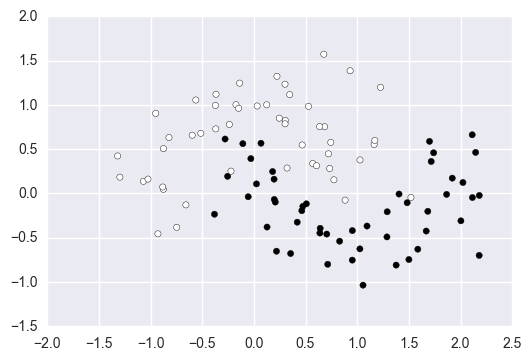

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.3, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(1)
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [6]:
# define a function for fitting model, plotting the points, and 
# visualizing the decision boundary of the classifier
def plot_classifier_regions(model, X, y):
    G = np.unique(y)
    
    markers = ['o', 's', '>', '']
    for c, i in zip(G, range(len(G))):
        plt.plot(X[y==c, 0], 
                 X[y==c, 1], 
                 markers[c])
    
    xlim = [X[:, 0].min()-0.5, X[:, 0].max()+0.5]
    ylim = [X[:, 1].min()-0.5, X[:, 1].max()+0.5]    
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    model.fit(X, y)
    
    # compute and plot boundaries
    h = 0.01
    xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], h),
                         np.arange(ylim[0], ylim[1], h))
    
    if hasattr(model, 'decision_function'):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='magma', alpha=.8)
    
    return model

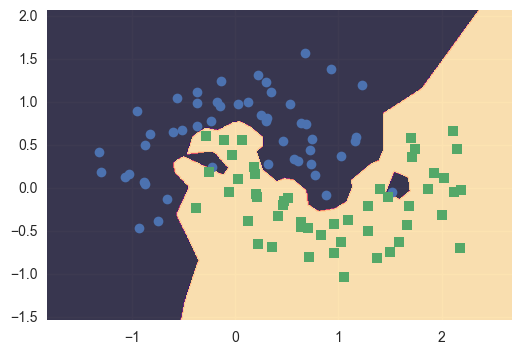

In [7]:
knn_model = plot_classifier_regions(KNeighborsClassifier(1), X, y)

In [1]:
# cross-validation of k-nearest neighbor classifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

knn_cv = plot_classifier_regions(KNeighborsClassifier(1), 
                                 X_train, y_train)

y_pred = knn_cv.predict(X_test)

print('cross-vaidated accuracy is', np.mean(y_pred == y_test))

markers = ['<', '>']
for c in set(y_test):
    plt.plot(X_test[y_test==c, 0], 
             X_test[y_test==c, 1], 
             markers[c], alpha=0.75)

ImportError: No module named model_selection

In [20]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [21]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [22]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False], dtype=bool)

In [23]:
(y_pred == y_test).mean()

0.92500000000000004

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

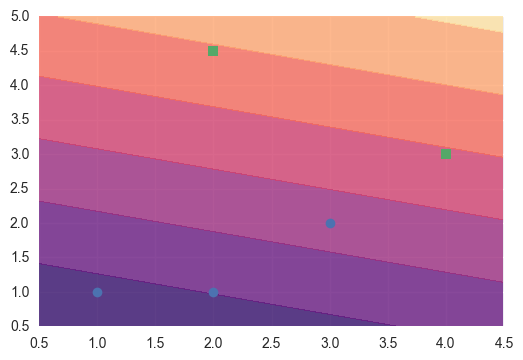

In [29]:
# linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plot_classifier_regions(LinearDiscriminantAnalysis(), X, y)

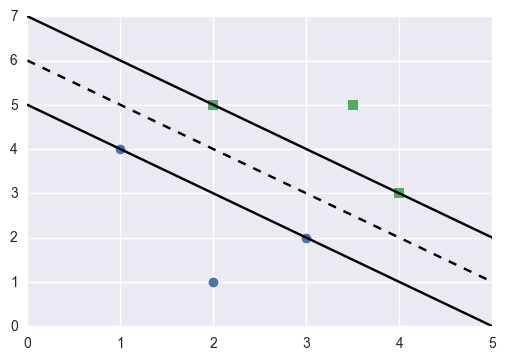

In [44]:
# Support Vector Machine (Classifier)
from sklearn.svm import SVC

X = np.array([[1, 1], [3, 2], [2, 1], [2, 4.5], [4, 3]])
y = np.array([0, 0, 0, 1, 1])

X = np.array([[3, 2], [2, 1], [2, 5], [4, 3], [1, 4], [3.5, 5]])
y = np.array([0, 0, 1, 1, 0, 1])

svc_model = SVC(kernel='linear')
svc_model.fit(X, y)

markers = ['o', 's']
for c in set(y):
    plt.plot(X[y==c, 0], 
             X[y==c, 1], 
             markers[c])

w = svc_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 5)
yy = a * xx - (svc_model.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = svc_model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svc_model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

plt.plot(xx, yy, 'k--')
plt.plot(xx, yy_down, 'k-')
plt.plot(xx, yy_up, 'k-')

cv accuracy:  0.8


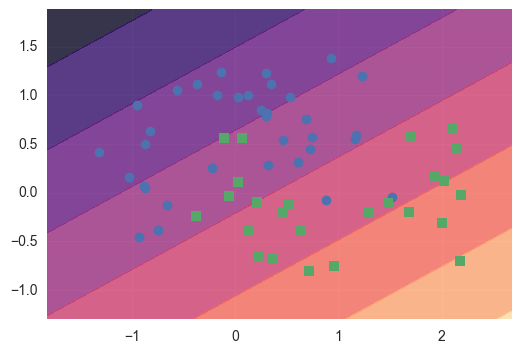

In [45]:
from sklearn.svm import SVC
X, y = make_moons(noise=0.3, random_state=0)

svm_model = plot_classifier_regions(SVC(kernel='linear'), 
                                    X_train, y_train)

print('cv accuracy: ', np.sum(svm_model.predict(X_test)==y_test)/len(y_test))

cv accuracy:  0.65


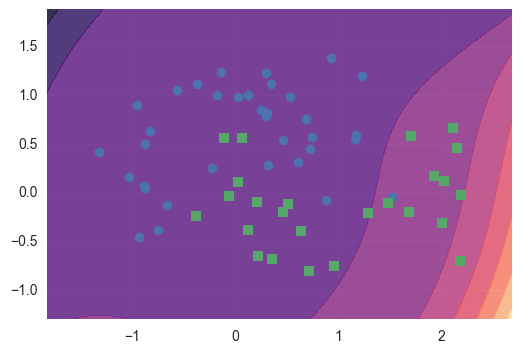

In [42]:
X, y = make_moons(noise=0.3, random_state=0)

svm_model = plot_classifier_regions(SVC(kernel='poly',degree=5), 
                                    X_train, y_train)

print('cv accuracy: ', np.sum(svm_model.predict(X_test)==y_test)/len(y_test))

cv accuracy:  0.875


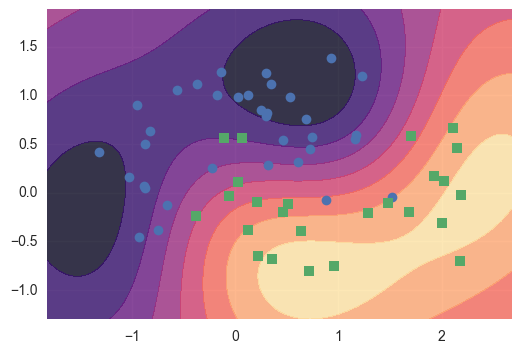

In [43]:
X, y = make_moons(noise=0.3, random_state=0)

svm_model = plot_classifier_regions(SVC(kernel='rbf'), 
                                    X_train, y_train)

print('cv accuracy: ', np.sum(svm_model.predict(X_test)==y_test)/len(y_test))